In [1]:
import numpy as np
import matplotlib.pyplot as plt

# original signal
generate intermittent signal with three different frequencies. One is 100Hz and shows in the range form 0(sec) to 1(sec), another is 200Hz in the range form 0.6(sec) to 0.8(sec), and the last one is 300Hz in the range from 0.2(sec) to 0.3(sec) 

Text(0, 0.5, 'amplitude')

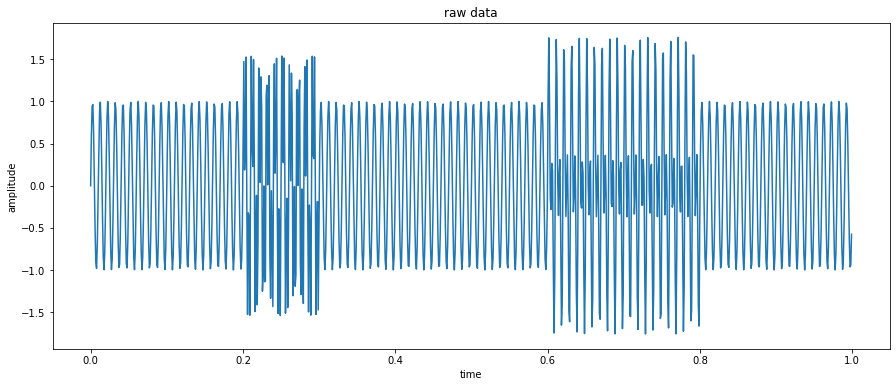

In [2]:
fs = 1024
t = np.arange(0, 1.0, 1.0 / fs)
features = [100,200,300]
intervals = [np.array([tt for tt in t]),
             np.array([tt if (0.6 < tt < 0.8) else 0 for tt in t]),
             np.array([tt if (0.2 < tt < 0.3) else 0 for tt in t]),
            ]
data = np.zeros(shape = (len(t),))
for i in range(len(features)):
    data += np.sin(2 * np.pi * features[i] * intervals[i])
plt.rcParams["figure.figsize"] = (15, 6)
plt.figure()
plt.plot(t,data)
plt.title("raw data")
plt.xlabel("time")
plt.ylabel("amplitude")

# basis of fourier transform
all basis with different frequency is extended unlimitly

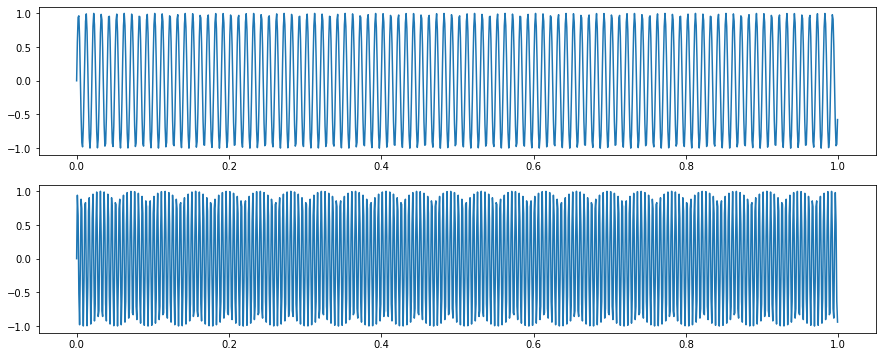

In [6]:
base1 = np.sin(2 * np.pi * 100 * t)
base2 = np.sin(2 * np.pi * 200 * t)
plt.figure()
plt.subplot(2,1,1)
plt.plot(t, base1)
plt.subplot(2,1,2)
plt.plot(t, base2)

# Spectrum after applying fourier transform for original signal.

Apparently, at 100Hz, 200Hz and 300Hz have more intensive energy response than others do, which means the original signal is mainly constructed by the three frequencies.

But we can't have the information about when these specific frequencies show

([<matplotlib.axis.XTick at 0x2422aab12e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

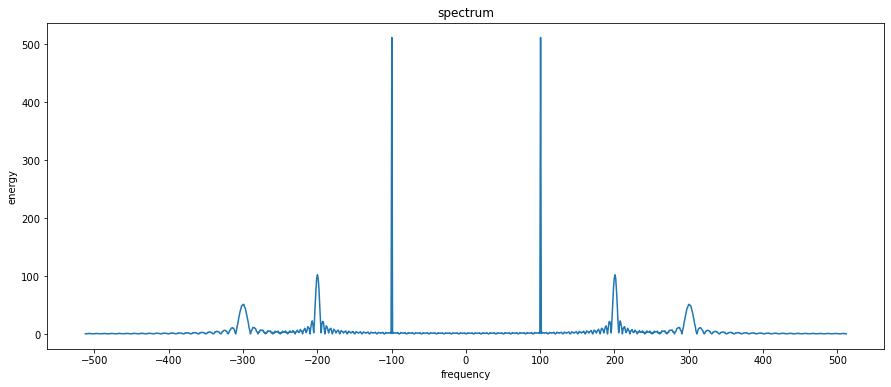

In [7]:
f = np.linspace(-fs / 2, fs / 2, len(data))
spectrum = np.abs(np.fft.fftshift(np.fft.fft(data)))
plt.rcParams["figure.figsize"] = (15, 6)
plt.figure()
plt.plot(f,spectrum)
plt.ylabel('energy')
plt.xlabel('frequency')
plt.title('spectrum')
plt.xticks([100 * i for i in range(-5,6)])